<a href="https://colab.research.google.com/github/chltmd132600-max/cv/blob/main/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


➡️ CV 텍스트 파일을 선택하세요.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving cv_data.txt to cv_data (1).txt
📌 Top 20 Words:
experience : 11
skills : 9
marketing : 7
management : 7
university : 7
english : 7
staff : 7
present : 6
education : 6
languages : 6
native : 6
summary : 5
years : 5
bachelor : 5
project : 5
engineer : 5
nurse : 5
mumbai : 5
hotel : 5
manager : 5

📌 Top 10 Bigrams:
education bachelor : 4
project management : 4
native english : 4
marketing specialist : 3
hotel manager : 3
los angeles : 2
angeles ca : 2
experience digital : 2
digital campaigns : 2
social media : 2

📌 Top 10 Trigrams:
los angeles ca : 2
languages english native : 2
mumbai general hospital : 2
first aid cpr : 2
education bachelor science : 2
native english fluent : 2
hotel manager lisbon : 2
emily chen marketing : 1
chen marketing specialist : 1
marketing specialist los : 1


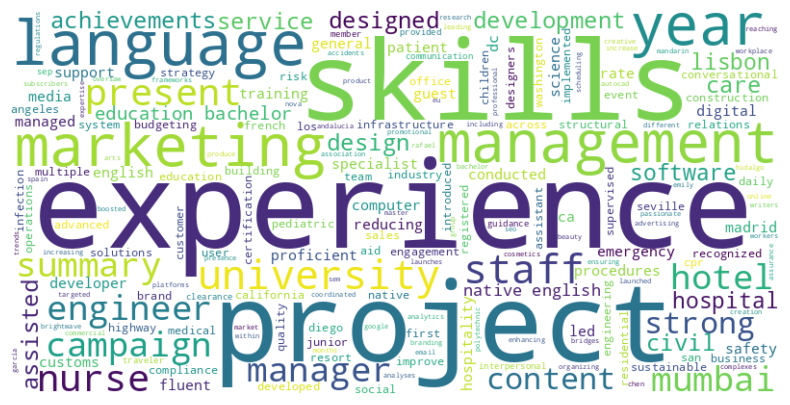

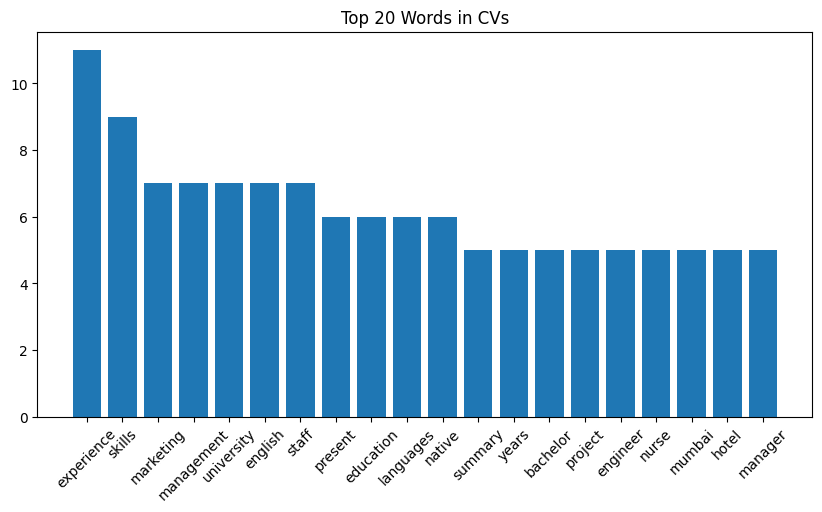

In [2]:
# ============================================
# 🔹 Colab에서 바로 실행 가능 (punkt_tab 오류 방지)
# ============================================

# 1. 필요한 라이브러리 설치
!pip install --quiet nltk wordcloud matplotlib

# 2. 라이브러리 불러오기
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams, FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 3. NLTK 데이터 다운로드 (punkt, punkt_tab, stopwords)
nltk.download('punkt')
nltk.download('punkt_tab')   # punkt_tab 추가
nltk.download('stopwords')

# 4. CV 텍스트 파일 업로드
from google.colab import files
print("➡️ CV 텍스트 파일을 선택하세요.")
uploaded = files.upload()  # 업로드 창에서 파일 선택
filename = list(uploaded.keys())[0]

# 5. 텍스트 불러오기
with open(filename, "r", encoding="utf-8") as f:
    text = f.read()

# 6. 텍스트 전처리
text = text.lower()  # 소문자 변환
tokens = word_tokenize(text)
tokens = [t for t in tokens if t.isalpha()]  # 알파벳만 남김
stop_words = set(stopwords.words("english"))
tokens = [t for t in tokens if t not in stop_words]

# 7. 단어 빈도 분석 (Top 20)
fdist = FreqDist(tokens)
top_words = fdist.most_common(20)
print("📌 Top 20 Words:")
for word, freq in top_words:
    print(f"{word} : {freq}")

# 8. Bigram & Trigram 분석
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

bigram_freq = FreqDist(bigrams).most_common(10)
trigram_freq = FreqDist(trigrams).most_common(10)

print("\n📌 Top 10 Bigrams:")
for bg, freq in bigram_freq:
    print(f"{' '.join(bg)} : {freq}")

print("\n📌 Top 10 Trigrams:")
for tg, freq in trigram_freq:
    print(f"{' '.join(tg)} : {freq}")

# 9. 시각화 (Word Cloud)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 10. 시각화 (막대그래프)
words, freqs = zip(*top_words)
plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Words in CVs")
plt.show()
